<h1> CH04 Logistic Regression</h1>

- 2021.07,28
- Machine Learning Seminar

In [ ]:
# csv 파일로 구성되어 있는 데이터프레임 가져오기

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 처음 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species'])) # 정렬 없이 Species 열에 등장한 고유의 값을 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


<h3> Input 데이터 처리 </h3>

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


<h3> Target 데이터 처리 </h3>

In [ ]:
fish_target = fish['Species'].to_numpy()

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


<h3> 데이터 나누기 </h3>

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state = 42)



<h3> 표준화(StandardScaler, MinMaxScaler) </h3>
1. StandardScaler=(X-mean)/std 
2. MinMaxScaler=(X-Min)/(Max-Min)

In [ ]:
# 1. StandardScaler=(X-mean)/std

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 2. MinMaxScaler=(X-Min)/(Max-Min)

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(train_input)
train_mscaled = mm.transform(train_input)
test_mscaled = mm.transform(test_input)

1. StandardScaler를 사용한 데이터

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print('Standard',kn.score(train_scaled,train_target))
print('Standard',kn.score(test_scaled,test_target))


Standard 0.8907563025210085
Standard 0.85


2. MinMaxScaler를 사용한 데이터

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knm=KNeighborsClassifier(n_neighbors=3)
knm.fit(train_mscaled,train_target)
print('MinMax',knm.score(train_mscaled,train_target))
print('MinMax',knm.score(test_mscaled,test_target))


MinMax 0.8739495798319328
MinMax 0.85


<h4> 알파벳 순으로 정렬 </h4>


In [ ]:
print(kn.classes_)
print(knm.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 문자열 타깃값으로 된 다중분류에서 predict()는 문자열로 반환

print('Standard',kn.predict(test_scaled[:5]))
print('MinMax',knm.predict(test_mscaled[:5]))

Standard ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
MinMax ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


<h2> 예측이 되는 과정 -> 확률의 모습 preidct_proba() 사용 </h2>

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
probam = knm.predict_proba(test_mscaled[:5])
print('Standard',np.round(proba,decimals=4)) # 소수점 4번째 자리까지 표기 (5번째 자리에서 반올림) 
print('MinMax',np.round(probam,decimals=4))

# 3개에 대한 확률값 
# 0/3, 1/3, 2/3, 3/3

Standard [[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
MinMax [[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])



[['Roach' 'Perch' 'Perch']]


<br><br><br>


<h1> 로지스틱 회귀 (Logistic Regression) </h1>

- 분류 모델
- 시그모이드 함수(Sigmoid Function, Logistic Function)


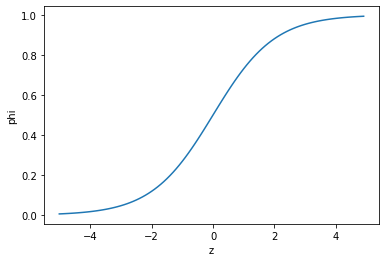

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z)) # 시그모이드 함수
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()



<h3> 이진 분류 (Bream과 Smelt) </h3>

- Boolean Indexing: 넘파이 배열이 TRUE, FALSE 값을 전달하여 행 선택


In [ ]:
bream_smelt_indexes = (train_target =='Bream')|(train_target=='Smelt') 
train_bream_smelt = train_scaled[bream_smelt_indexes]
test_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,test_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)



['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


<br><br>
<h3> 가중치(a,b,c,d,e), bias(f) 확인 </h3>


In [ ]:
print(lr.coef_, lr.intercept_)



[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


<h3> z값 출력 </h3>

- z값이 음수인 데이터(2번째)만 Smelt로 분류된다.

In [ ]:
decision = lr.decision_function(train_bream_smelt[:5])
print(decision)



[[ 13.07720468   5.67934885  -3.35338245  -3.31336574   2.17359359
  -20.94250286   6.67910394]
 [-11.87097228   2.30259128   5.38252609  -3.16153247   3.19008966
    8.30335235  -4.14605462]
 [ 12.33857825   5.65076255  -4.66937699  -2.14614218   1.70355215
  -17.3821562    4.50478241]
 [ 10.54147804   6.10966909  -4.8118551   -2.96232184   2.29026273
  -14.96397114   3.79673822]
 [ 13.67847569   5.73147515  -4.25488176  -2.55078686   1.73520683
  -20.24819553   5.90870648]]


<h3> 0~1값인 확률로 나타내기 (시그모이드 함수 이용) </h3>

- 0.5가 넘으면 양성 클래스(Smelt)



In [ ]:
from scipy.special import expit
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


<br><br><br>


<h1> 로지스틱 회귀를 이용한 다중 분류  </h1>

In [ ]:
# 로지스틱 회귀로 다중 분류(7개의 생선 분류) -> max_iter(반복 학습):1000, C(규제) : 20 

# max_iter: 반복 학습 (충분히 높은 값을 주어야 함)
# C : 규제


# lr = LogisticRegression(C=5, max_iter = 100) 
lr = LogisticRegression(C=20, max_iter = 1000) 
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))
print()

# 예측
print(lr.predict(test_scaled[:5]))
print()

# 확률
# 각 물고기 종류에 따른 확률값 출력(7개 중에 가장 확률이 높은 것에 해당하는 종류로 예측하게 됨)
# 전체 확률의 합은 1

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

0.9327731092436975
0.925

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


<br><br>

<h3> 이진 분류와 다중 분류의 차이점 </h3>


- 이진 분류에서는 z값을 구하는 2차원 배열의 행이 1개이지만, 다중 분류에서는 힁애 개수가 7개
- 다중 분류에서는 각각의 클래스마다 z를 계산 -> z값이 가장 큰 값이 예측 클래스가 됨 (각 7개의 물고기에 따라 회귀 식(각 z값에 따른 함수)이 생성)

- 다중 분류에서는 **소프트맥스 함수**를 사용
  - n개 생선에 대한 확률의 합이 1이 되도록 
  - 각 종류에 대해 가중치, bias로 이루어진 방정식을 사용하여 각 종류마다 이진 분류를 한 결과를 다중 분류로 하는 방식

In [ ]:
print(lr.coef_.shape,lr.intercept_.shape)



(7, 5) (7,)


<br>

<h4> 다중 분류의 z값(z1~z7) </h4>

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


<br>

<h3> 확률로 나타내기 </h3>


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
# proba = softmax(decision)
print(np.round(proba,decimals=3))

# 한 행에 대한 확률 값들의 합이 1, 그리고 가장 큰 확률값을 가진 종류로 예측 가능

[[0.    0.001 0.044 0.    0.007 0.    0.   ]
 [0.    0.002 0.029 0.    0.005 0.633 0.   ]
 [0.    0.    0.006 0.163 0.003 0.003 0.   ]
 [0.    0.    0.004 0.    0.007 0.    0.001]
 [0.    0.    0.084 0.    0.008 0.    0.   ]]


<br><br>

---

<br>

<h1> 점진적인 학습 알고리즘 </h1>

- 빅데이터 -> 데이터가 많아질 수록 학습 시간이 많이 소요되며, 새로운 데이터를 추가하는 경우 데이터 관리에 대한 문제(기존 데이터 관리, 새로운 데이터에 대한 편협성 문제) 등 고려해야할 것들이 많다.

- 데이터 중, 일부만을 골라 학습시키는 과정 (Sampling)


<br>

<h1> 확률적 경사 하강법 SDG(Stochastic Gradient Descent)  </h1>

- stochastic: 샘플링(randomly determined; having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely.)

<br>

<h3> 손실 함수 (loss function) </h3>

- 샘플 하나에 대한 손실 값
- 비용 함수 (cost function) : 훈련 세트에 있는 모든 샘플에 대한 손실의 합
- ex) 분류에서의 손실 -> 값을 맞추지 못하는 것(오답)

<br>

<h4> 로지스틱 손실 함수 (logistic loss function) / 이진 크로스엔트로피 손실 함수 (binary coross-entropy loss function) </h4>




<h2> SDGClassfier </h2>



In [ ]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)



# SDGClassifier 확률적 경사 하강법 제공 하는 대표 클래스

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # loss='log' : 로지스틱 손실함수로 지정 / max_iter=10 : 에포크를 10번
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))



# ConvergenceWarning - 모델이 충분히 수렴하지 않았다는 것 => 점진적 학습 필요



0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<h3> 점진적 학습 : partial_fit() </h3>

- 에포크 횟수가 적다면? -> 과소적합이 될 가능성이 큼
- 많다면? -> 과대적합이 될 가능성이 큼
  => 과대적합이 시작하기 전에 훈련을 멈춰야 함 (**조기 종료**)
  

In [ ]:
sc.partial_fit(train_scaled,train_target) # 점진적 학습(호출 할 때마다 1에포크씩 이어서 훈련)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))



0.8151260504201681
0.825


<h3> 그래프로 표현 </h3>



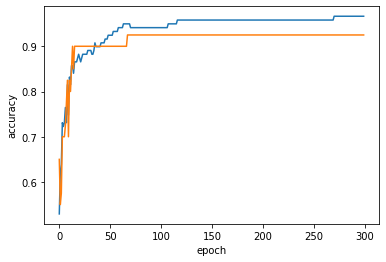

In [ ]:
# 그래프로 표현 하기 전 train_score, test_score에 score 값 저장하기

import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

# partial_fit() 만 사용하는 경우, classes를 지정해주어야함

# 그래프로 나타내기

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

최적의 에포크(max_iter=100)를 지정


In [ ]:
sc = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))



0.957983193277311
0.925
